In [2]:
%matplotlib notebook

from rlsm.datasets.synthetic import generate_data
from rlsm import ReciprocityLSM

In [43]:
Y, params = generate_data(n_nodes=200, density=0.25, mu=1, random_state=2)

Z = params['Z']
print(params['recip_coef'], params['dist_coef'])

-0.1077163463525288 0.7514554632553725


In [44]:
from sklearn.metrics import roc_auc_score
from rlsm.network_utils import adjacency_to_vec

roc_auc_score(adjacency_to_vec(Y), params['probas'])

0.8401709037707406

<IPython.core.display.Javascript object>


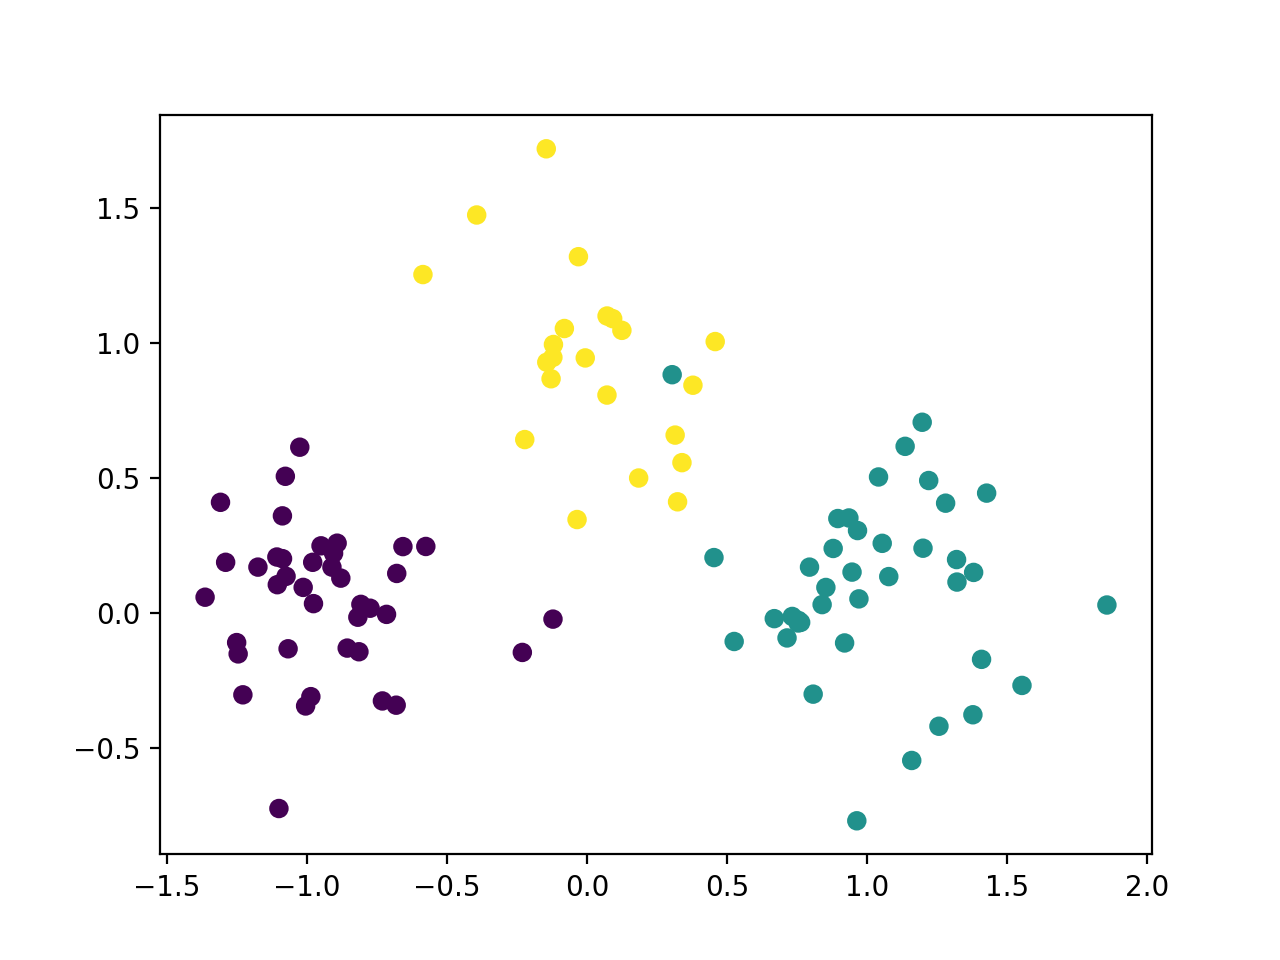

In [5]:
plt.scatter(Z[:, 0], Z[:, 1],c=params['c'])

<IPython.core.display.Javascript object>


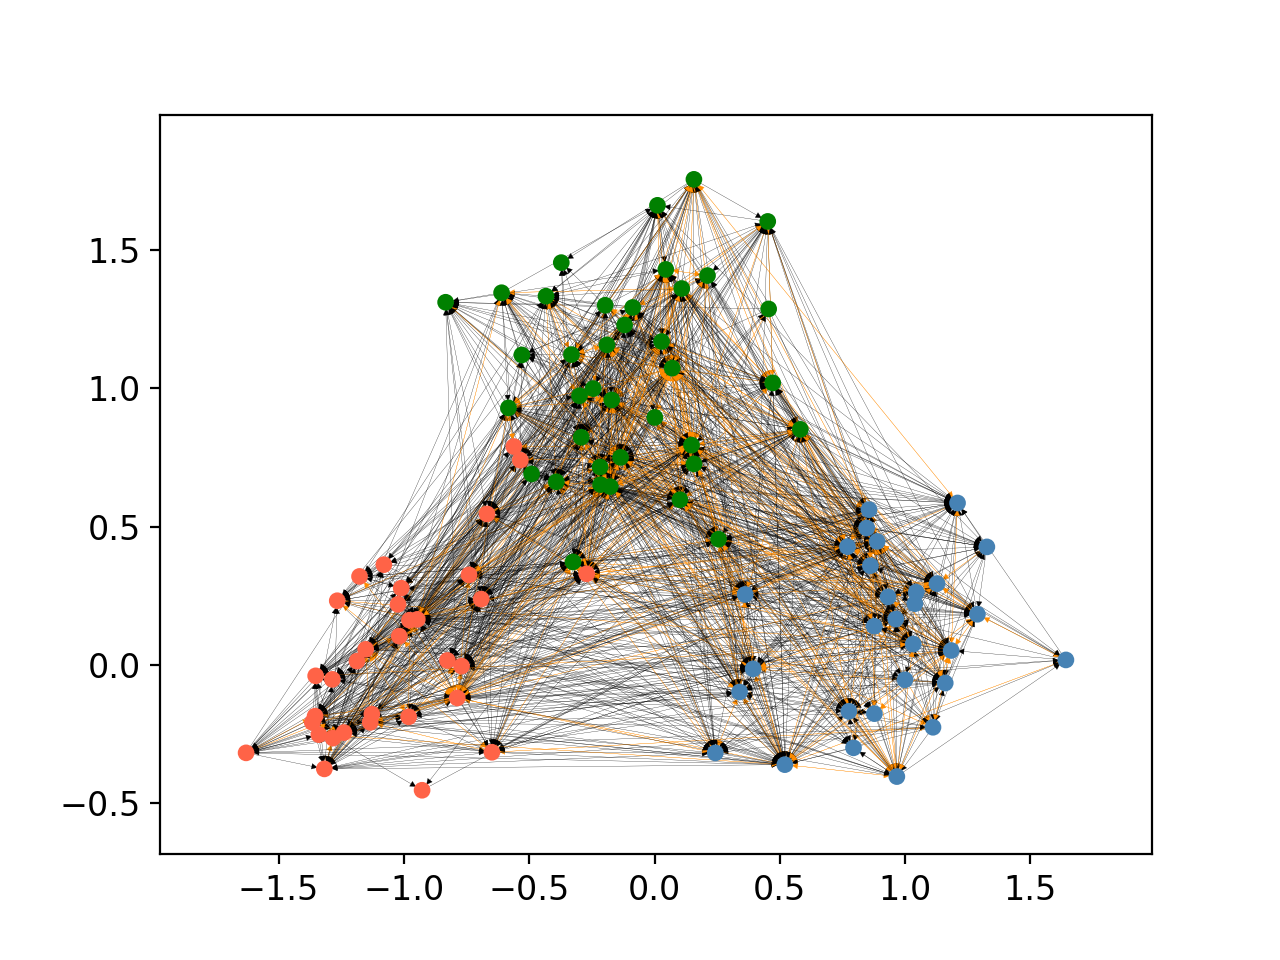

In [11]:
import networkx as nx

colors = np.asarray(["tomato", "steelblue", "green"])
#colors = np.asarray(["red", "cyan", "purple", "yellow","pink", 'orange'])
g = nx.from_numpy_array(Y, create_using=nx.DiGraph)
elist = list(nx.to_edgelist(g))
ecolor = ['darkorange' if Y[e[1], e[0]] else 'black' for e in elist]
pos = {k : Z[k] for k in range(Y.shape[0])}
nx.draw_networkx(g, pos, 
                 arrowsize=5,
                 node_color=colors[params['c']],
                 edge_color=ecolor, width=0.1, with_labels=False,
                 node_size=25)
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True,
                labelsize=12)

In [ ]:
model = ReciprocityLSM(n_features=2, reciprocity_type='distance', random_state=42)
model.sample(Y, n_warmup=2000, n_samples=2000)

warmup:  14%|█████████                                                         | 551/4000 [00:44<02:23, 24.03it/s, 63 steps of size 1.13e-01. acc. prob=0.79]

In [37]:
model.auc_

0.862116894505904

In [38]:
model.print_summary()

AUC: 0.862, WAIC: 8341.123

                  mean       std    median      2.5%     97.5%     n_eff     r_hat
  recip_coef     -0.21      0.23     -0.21     -0.66      0.24    916.66      1.00
   dist_coef      0.48      0.13      0.49      0.23      0.74    809.99      1.00
       s_var      0.90      0.16      0.89      0.61      1.21    648.29      1.00
       r_var      0.96      0.15      0.94      0.67      1.25    648.71      1.00
     sr_corr      0.49      0.09      0.50      0.31      0.67    515.12      1.00

Number of divergences: 23


In [39]:
print(params['recip_coef'], params['dist_coef'])

-0.006050128504159646 0.6191474066799831


<IPython.core.display.Javascript object>


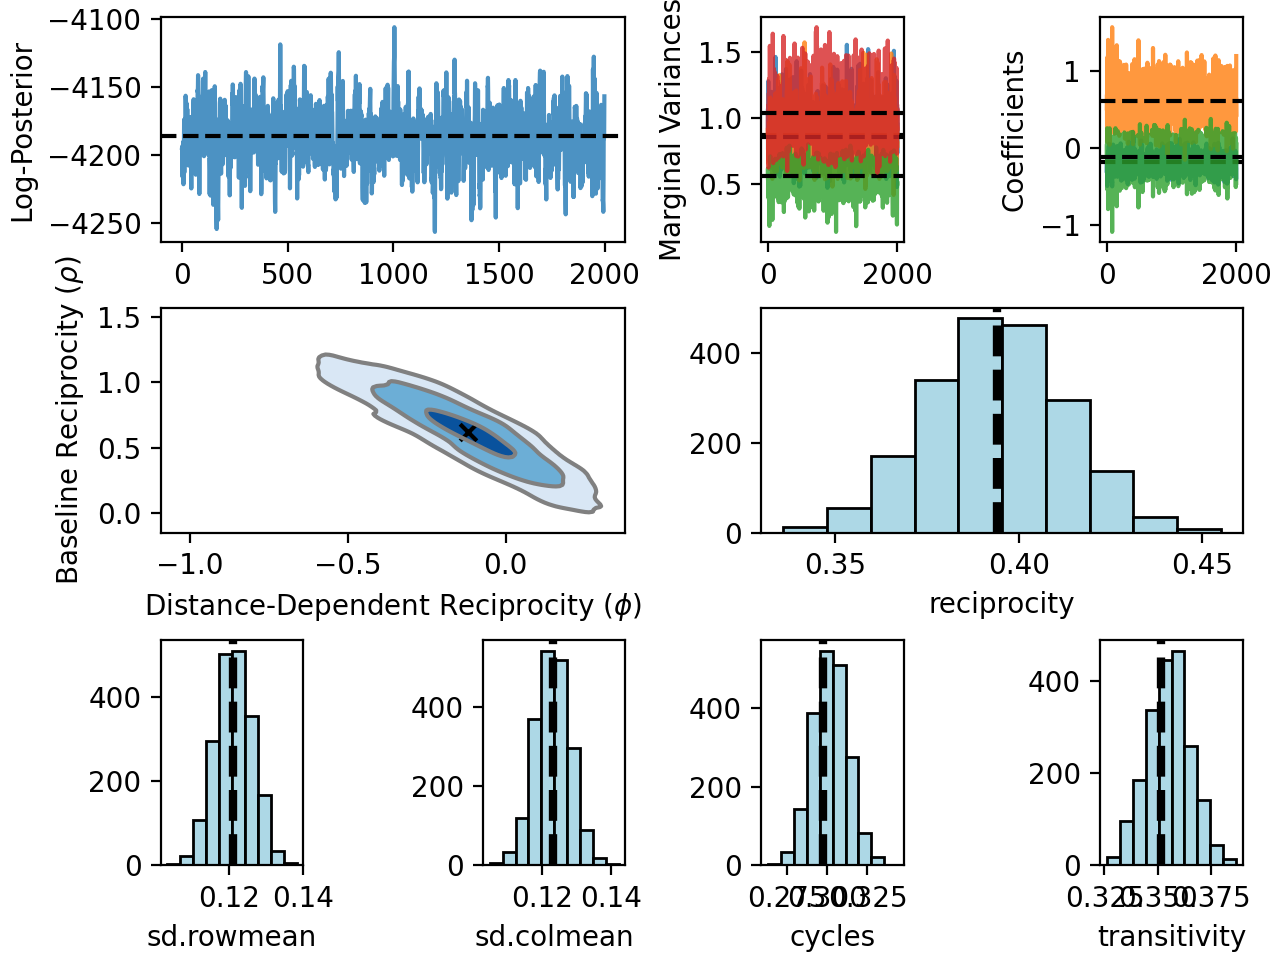

{'A': <Axes: label='A', ylabel='Log-Posterior'>,
 'B': <Axes: label='B', ylabel='Marginal Variances'>,
 'C': <Axes: label='C', ylabel='Coefficients'>,
 'D': <Axes: label='D', xlabel='Distance-Dependent Reciprocity ($\\phi$)', ylabel='Baseline Reciprocity ($\\rho$)'>,
 'E': <Axes: label='E', xlabel='reciprocity'>,
 'F': <Axes: label='F', xlabel='sd.rowmean'>,
 'G': <Axes: label='G', xlabel='sd.colmean'>,
 'H': <Axes: label='H', xlabel='cycles'>,
 'I': <Axes: label='I', xlabel='transitivity'>}

In [11]:
model.plot()

0.49983969902237796
0.670049117372599


<IPython.core.display.Javascript object>


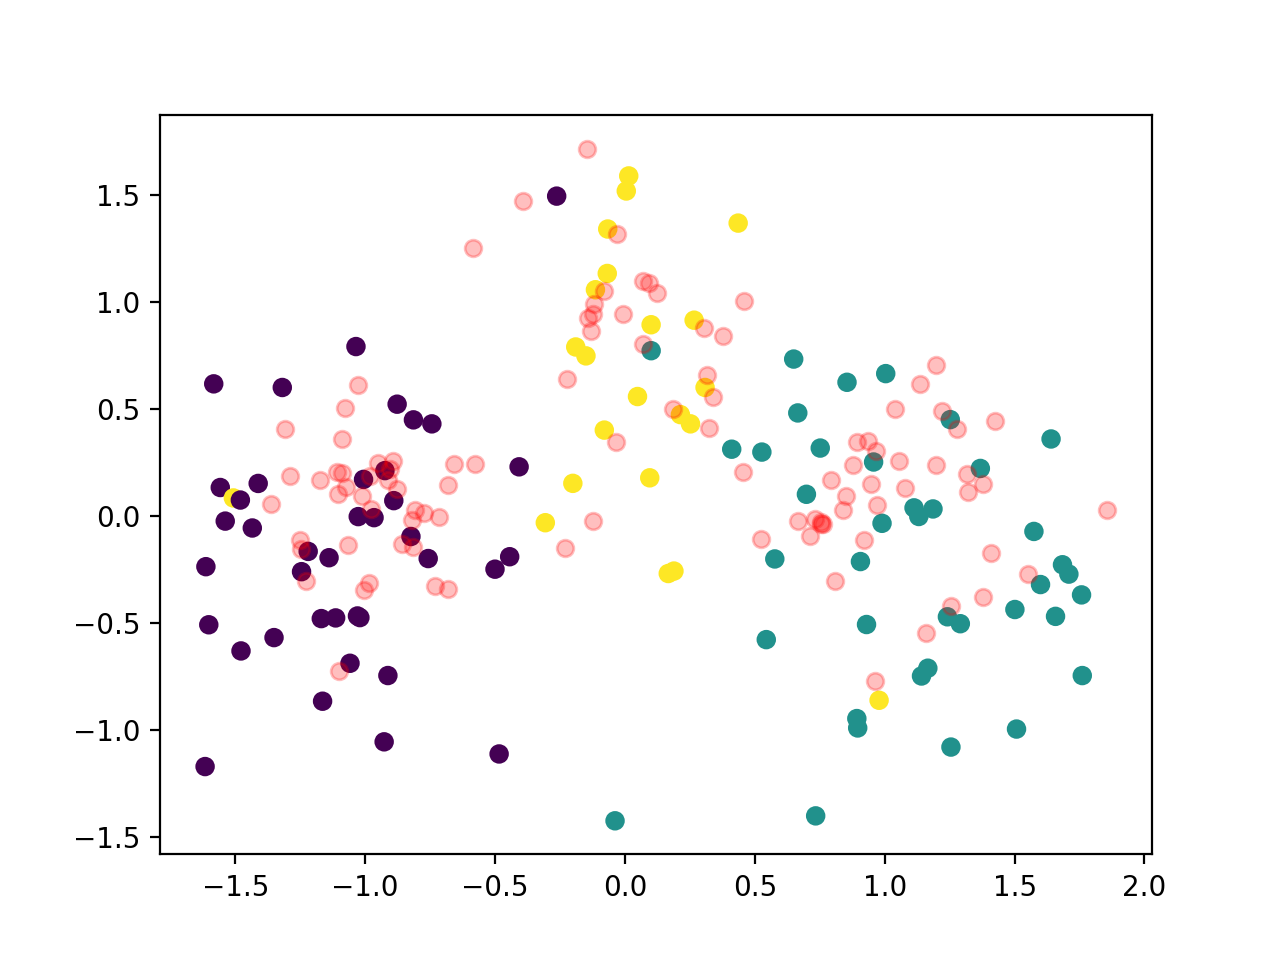

In [13]:
from scipy.linalg import orthogonal_procrustes

z = params['c']
R, _ = orthogonal_procrustes(model.Z_, Z)
U_est = model.Z_ @ R
print(np.sqrt(np.mean((U_est - Z) ** 2)))
print(np.sqrt(np.sum((U_est - Z) ** 2)) / np.sqrt(np.sum(Z **2 )))

plt.scatter(U_est[:, 0], U_est[:, 1], c=z)
plt.scatter(Z[:, 0], Z[:,1], alpha=0.25, c='red')